In [ ]:
# Using Money Flow Index (MFI) to determine stock buy and sell points

#Libs
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import warnings

plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
files.upload()

Saving VOO.csv to VOO (1).csv


{'VOO.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2010-09-09,102.500000,102.500000,101.139999,101.320000,82.484428,26500\n2010-09-10,101.680000,101.860001,101.300003,101.779999,82.858887,8600\n2010-09-13,102.959999,103.139999,102.500000,103.059998,83.900963,33750\n2010-09-14,102.839996,103.480003,102.379997,103.040001,83.884697,59400\n2010-09-15,102.620003,103.379997,102.400002,103.300003,84.096321,9250\n2010-09-16,103.019997,103.320000,102.699997,103.260002,84.063782,59550\n2010-09-17,103.879997,103.879997,103.019997,103.360001,84.145203,49350\n2010-09-20,103.739998,105.040001,103.459999,105.040001,85.512886,19000\n2010-09-21,105.019997,105.440002,104.279999,104.720001,85.252388,19250\n2010-09-22,104.559998,105.040001,103.959999,104.160004,84.796455,18100\n2010-09-23,103.320000,104.339996,103.120003,103.300003,84.096321,33350\n2010-09-24,103.940002,104.900002,103.860001,104.839996,85.813606,24100\n2010-09-27,104.980003,104.980003,104.339996,104.339996,85.404335,15000\n2010-09-2

In [ ]:
#Present Data
df = pd.read_csv('VOO.csv')

#Set Index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df

FileNotFoundError: ignored

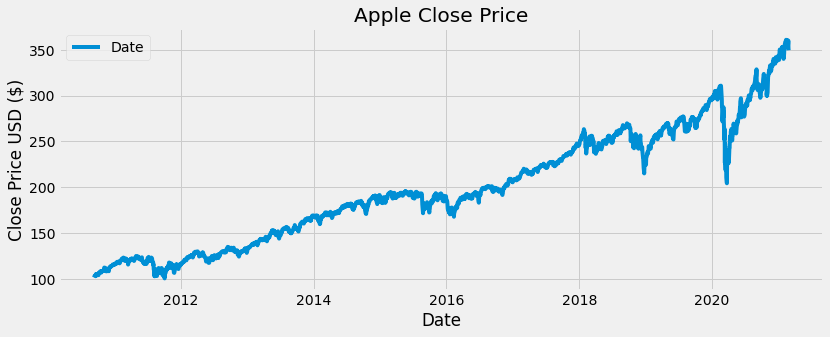

In [ ]:
#Visualizing Data
plt.figure(figsize=(12.2, 4.5))
plt.plot(df['Close'], label = 'Close Price')
plt.title('Apple Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend(df.columns.values, loc='upper left')

In [ ]:
#Calculate typical price

typical_price = (df['Close'] + df['High'] + df['Low']) / 3
typical_price

2010-09-09    101.653333
2010-09-10    101.646668
2010-09-13    102.899999
2010-09-14    102.966667
2010-09-15    103.026667
                 ...    
2021-02-22    356.506663
2021-02-23    354.436666
2021-02-24    358.313334
2021-02-25    353.956655
2021-02-26    350.589996
Length: 2635, dtype: float64

In [ ]:
#Get the Period
#MFI uses a period of 14 days

period = 14

In [ ]:
#Calc Money Flow
money_flow = typical_price * df['Volume']
money_flow

2010-09-09    2.693813e+06
2010-09-10    8.741613e+05
2010-09-13    3.472875e+06
2010-09-14    6.116220e+06
2010-09-15    9.529967e+05
                  ...     
2021-02-22    1.173263e+09
2021-02-23    1.861182e+09
2021-02-24    1.182864e+09
2021-02-25    2.495111e+09
2021-02-26    2.657016e+09
Length: 2635, dtype: float64

In [ ]:
# Get&Sort all +/- Money Flows

positive_flows = []
negative_flows = []

#Loop though typical price
for i in range(1, len(typical_price)):
  if typical_price[i] > typical_price[i-1]:
    positive_flows.append(money_flow[i-1])
    negative_flows.append(0)
  elif typical_price[i] < typical_price[i-1]:
    negative_flows.append(money_flow[i-1])
    positive_flows.append(0)
  else:
    positive_flows.append(0)
    negative_flows.append(0)

In [ ]:
# Get all of the positive/negative moeny flows within the period
positive_mf = []
negative_mf = []

for i in range(period-1, len(positive_flows)):
  positive_mf.append(sum(positive_flows[i + 1- period : i+1]))
for i in range(period-1, len(negative_flows)):
  negative_mf.append(sum(negative_flows[i + 1- period : i+1]))


NameError: ignored